In [5]:
import sympy as sy

n=6
a=0
b=6
def f(x):
    return -16*x**3/165+48*x**2/55+4 #Eingabe Funktion mit Sympy

h=(b-a)/n
print("h=",h)
x=sy.symbols('x')
exact = sy.integrate(f(x),(x,a,b))
print("exaktes Integral: " + str(exact)) # Beleg forderte  exaktes Integral, kann auch nicht schaden

h= 1.0
exaktes Integral: 3048/55


In [11]:
#### Rechteckregel, links ###
A=0
xi=0
for i in range (0,n):
    xi=a+i*h
    A+=h*f(xi)
print("A=",A)

A= 50.18181818181818


In [12]:
### Rechteckregel, Mitte ###

A=0
xi=0
for i in range (0,n):
    xi=a+i*h+h/2
    A+=h*f(xi)
print("A=",A)

A= 55.41818181818182


In [13]:
### Rechteckregel, Rechts ###

A=0
xi=0
for i in range (1,n+1):
    xi=a+i*h
    A+=h*f(xi)
print("A=",A)

A= 60.654545454545456


Fehlerabschätzung (Reckteckregel, Links)
ϕmax bestimmen
1. max [a≤ξ≤b] |f′(ξ)| 
a.) erste Ableitung Null 
b.) Intervallgrenzen
c.) nichtdifferenzierbare Stelle

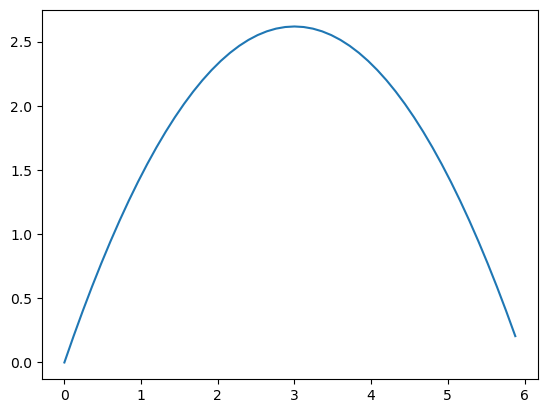

In [8]:
import matplotlib.pyplot as plt
import numpy as np
xArr = np.arange(a, b, (b-a)/50)
x=sy.symbols('x')
f1=sy.diff(f(x))
f2=sy.diff(f1)
f3=sy.diff(f2)
f4=sy.diff(f3)
f5=sy.diff(f4)
y = sy.lambdify(x, f1, "numpy")
y = y(xArr)
plt.plot(xArr, y)
plt.show()

In [9]:
phimax=10**(-3) #geforderte Genauigkeit eintragen
xmax=3 #x-Wert des Betragsmaximums  eintragen

x=sy.symbols('x')
f1=sy.diff(f(x))
#print("f'=",f1)
f2=sy.diff(f1)
#print("f''=",f2)
max=f1.evalf(subs={x:xmax})
print("max= ", max)
nn=sy.symbols('n')
sy.solve(sy.Le(max*((b-a)**2)/(2*nn),phimax)) 

max=  2.61818181818182


(47127.2727272727 <= n) | (n < 0)

### Trapezregel

In [18]:
import sympy as sy

n=6
a=3
b=9
def f(x):
    return (5*x+1)/15+sy.ln(x-2) #Eingabe Funktion mit Sympy

h=(b-a)/n
print("h=",h)
exact = sy.integrate(f(x),(x,a,b))
print("exaktes Integral: " + str(exact)) # Beleg forderte  exaktes Integral, kann auch nicht schaden

h= 1.0
exaktes Integral: 32/5 + 7*log(7)


In [19]:
A=0
sum=0
xi=0
for i in range (1,n):
    xi=a+i*h
    sum+=f(xi)
try:
    A=((b-a)/(2*n))*(f(a)+2*sum+f(b)).evalf()
except AttributeError:
    A=((b-a)/(2*n))*(f(a)+2*sum+f(b))
print("A=",A)
x=sy.symbols('x')
f1=sy.diff(f(x))
f2=sy.diff(f1)
f3=sy.diff(f2)
f4=sy.diff(f3)
f5=sy.diff(f4)

A= 19.9522062865378


Fehlerabschätzung (Trapezregel)
ϕmax bestimmen
1. max [a≤ξ≤b] |f′′(ξ)| 
a.) erste Ableitung Null 
b.) Intervallgrenzen
c.) nichtdifferenzierbare Stelle

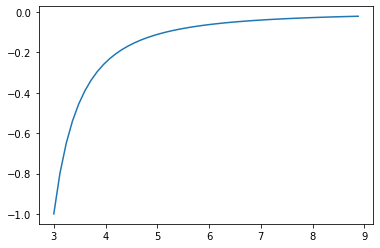

In [20]:
import matplotlib.pyplot as plt
import numpy as np
xArr = np.arange(a, b, (b-a)/50) #np.arange(Schrittweite)
x=sy.symbols('x')
y = sy.lambdify(x, f2, "numpy")
y = y(xArr)
plt.plot(xArr, y)
plt.show()

In [21]:
phimax=10**(-2)   #geforderte Genauigkeit eintragen
xmax=0          #x-Wert des Betragsmaximums eintragen

x=sy.symbols('x')
f1=sy.diff(f(x))
print("f'=",f1)
f2=sy.diff(f1)
print("f''=",f2)
f3=sy.diff(f2)
print ("f'''=",f3)
max=f2.evalf(subs={x:xmax})#x-wert von Max f'' eintragen NOTE: Scheinen nur halbiert richtig zu sein
print(" max [a≤ξ≤b] |f′′(ξ)|=",max)
nn=sy.symbols('n')
print("n=", end="")
sy.solve(sy.Le(max*((b-a)**3)/(12*nn**2),phimax))

f'= 1/3 + 1/(x - 2)
f''= -1/(x - 2)**2
f'''= 2/(x - 2)**3
 max [a≤ξ≤b] |f′′(ξ)|= -0.250000000000000
n=

Ne(n, 0)

### Simpsonregel

In [17]:
import sympy as sy
import math

m=3
a=3
b=9
def f(x):
    return (5*x+1)/15+sy.ln(x-2)

n=2*m
h=(b-a)/n
print("h=",h)
sum=0
A=0
for i in range(1,n):
    if i%2==1:
        q=4
    else:
        q=2
    sum+=q*f(a+(h*i))
A=(h/3)*(f(a)+sum+f(b))
print(A)
x=sy.symbols('x')
f1=sy.diff(f(x))
f2=sy.diff(f1)
f3=sy.diff(f2)
f4=sy.diff(f3)
f5=sy.diff(f4)

h= 1.0
0.333333333333333*log(7) + 19.366968148612


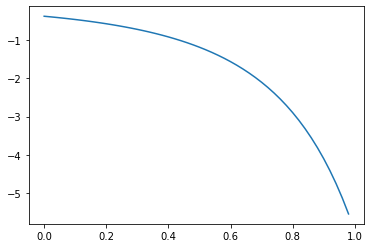

In [12]:
import matplotlib.pyplot as plt
import numpy as np
xArr = np.arange(a, b, (b-a)/50) #ggf.Schrittweite anpassen
x=sy.symbols('x')
y = sy.lambdify(x, f4, "numpy")
y = y(xArr)
plt.plot(xArr, y)
plt.show()

In [13]:
xmax=1
phimax=10**(-9) #geforderte Genauigkeit eintragen

max=f4.evalf(subs={x:xmax})
print("f(max)=",max)
nn=sy.symbols('n')
print("n=", end="")
sy.solve(sy.Le(max*((b-a)**5)/(180*nn**4),phimax)) #Betragsmaximum vorn eintragen

f(max)= -6.00000000000000
n=

Ne(n, 0)

max a≤ξ≤b ∣f''''(ξ)∣